In [1]:
# Adding branch for user review
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
data = pd.read_excel(r'MK8Data.xlsx', index_col='Names').dropna()
data

,Weight,Acceleration,On-road Traction,Off-road Traction,Mini-Turbo,Ground Speed,Water Speed,Anti-gravity Speed,Air Speed,Ground Handling,Water Handling,Anti-gravity Handling,Air Handling
Names,,,,,,,,,,,,,
Standard Kart,2.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0
Pipe Frame,1.0,6.0,3.0,4.0,6.0,1.0,3.0,1.0,1.0,5.0,4.0,4.0,2.0
Mach 8,3.0,3.0,2.0,4.0,4.0,3.0,3.0,5.0,4.0,2.0,2.0,4.0,2.0
Steel Driver,4.0,1.0,1.0,3.0,2.0,4.0,5.0,2.0,0.0,1.0,5.0,1.0,1.0
Cat Cruiser,2.0,5.0,4.0,3.0,5.0,2.0,2.0,3.0,4.0,4.0,2.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Plane Glider,2.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0
MKTV Parafoil,1.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0
Gold Glider,2.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0


In [3]:
# Remove all characters, karts, etc. that have exactly the same stats
data = data.drop_duplicates(keep='first')
data

,Weight,Acceleration,On-road Traction,Off-road Traction,Mini-Turbo,Ground Speed,Water Speed,Anti-gravity Speed,Air Speed,Ground Handling,Water Handling,Anti-gravity Handling,Air Handling
Names,,,,,,,,,,,,,
Standard Kart,2.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0
Pipe Frame,1.0,6.0,3.0,4.0,6.0,1.0,3.0,1.0,1.0,5.0,4.0,4.0,2.0
Mach 8,3.0,3.0,2.0,4.0,4.0,3.0,3.0,5.0,4.0,2.0,2.0,4.0,2.0
Steel Driver,4.0,1.0,1.0,3.0,2.0,4.0,5.0,2.0,0.0,1.0,5.0,1.0,1.0
Cat Cruiser,2.0,5.0,4.0,3.0,5.0,2.0,2.0,3.0,4.0,4.0,2.0,3.0,4.0
Circuit Special,3.0,1.0,3.0,1.0,1.0,5.0,1.0,4.0,2.0,1.0,1.0,2.0,0.0
Badwagon,4.0,0.0,2.0,5.0,0.0,5.0,2.0,3.0,1.0,0.0,1.0,1.0,0.0
Prancer,1.0,2.0,1.0,2.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0
Biddybuggy,0.0,7.0,1.0,4.0,7.0,0.0,1.0,2.0,1.0,5.0,4.0,5.0,4.0


In [4]:
# Get character names, kart names, etc.
karts = data.loc['Standard Kart' : 'Tanooki Kart'].T
chars = data.loc['Mario' : 'Cat Peach'].T
wheels = data.loc['Standard' : 'Sponge'].T
gliders = data.loc['Super Glider' :].T

In [5]:
# Sum up all possible stat combinations and add separate columns for character, kart, etc.
names = []
kart_list = []
char_list = []
wheel_list = []
glider_list = []
stat_list = []
for char in chars:
    for kart in karts:
        for wheel in wheels:
            for glider in gliders:
                kart_list.append(kart)
                char_list.append(char)
                wheel_list.append(wheel)
                glider_list.append(glider)
                names.append(char+'_'+kart+'_'+wheel+'_'+glider)
                stat_list.append(chars[char]+karts[kart]+wheels[wheel]+gliders[glider])

stats = pd.DataFrame(dict(zip(names, stat_list))).T
stats['Character'] = char_list
stats['Kart'] = kart_list
stats['Wheel'] = wheel_list
stats['Glider'] = glider_list
stats = stats.reindex(columns=['Character', 'Kart', 'Wheel', 'Glider', 'Weight', 'Acceleration', 
                               'Off-road Traction', 'Mini-Turbo', 'Ground Speed', 'Water Speed', 
                               'Anti-gravity Speed', 'Air Speed', 'Ground Handling', 'Water Handling', 
                               'Anti-gravity Handling', 'Air Handling'])
stats

,Character,Kart,Wheel,Glider,Weight,Acceleration,Off-road Traction,Mini-Turbo,Ground Speed,Water Speed,Anti-gravity Speed,Air Speed,Ground Handling,Water Handling,Anti-gravity Handling,Air Handling
Mario_Standard Kart_Standard_Super Glider,Mario,Standard Kart,Standard,Super Glider,11.0,11.0,11.0,10.0,12.0,13.0,11.0,14.0,11.0,9.0,11.0,11.0
Mario_Standard Kart_Standard_Cloud Glider,Mario,Standard Kart,Standard,Cloud Glider,10.0,12.0,11.0,11.0,11.0,13.0,12.0,13.0,11.0,9.0,11.0,12.0
Mario_Standard Kart_Standard_Wario Wing,Mario,Standard Kart,Standard,Wario Wing,12.0,11.0,10.0,10.0,12.0,12.0,12.0,14.0,11.0,10.0,10.0,11.0
Mario_Standard Kart_Standard_Peach Parasol,Mario,Standard Kart,Standard,Peach Parasol,11.0,12.0,10.0,11.0,11.0,12.0,12.0,13.0,11.0,10.0,10.0,12.0
Mario_Standard Kart_Monster_Super Glider,Mario,Standard Kart,Monster,Super Glider,13.0,9.0,13.0,9.0,12.0,12.0,11.0,12.0,8.0,7.0,8.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cat Peach_Tanooki Kart_Off-Road_Peach Parasol,Cat Peach,Tanooki Kart,Off-Road,Peach Parasol,10.0,11.0,16.0,9.0,9.0,12.0,10.0,9.0,12.0,12.0,11.0,13.0
Cat Peach_Tanooki Kart_Sponge_Super Glider,Cat Peach,Tanooki Kart,Sponge,Super Glider,8.0,11.0,17.0,11.0,8.0,10.0,8.0,13.0,13.0,11.0,12.0,13.0
Cat Peach_Tanooki Kart_Sponge_Cloud Glider,Cat Peach,Tanooki Kart,Sponge,Cloud Glider,7.0,12.0,17.0,12.0,7.0,10.0,9.0,12.0,13.0,11.0,12.0,14.0
Cat Peach_Tanooki Kart_Sponge_Wario Wing,Cat Peach,Tanooki Kart,Sponge,Wario Wing,9.0,11.0,16.0,11.0,8.0,9.0,9.0,13.0,13.0,12.0,11.0,13.0


In [6]:
# 2D Optimization - Get max ground speed for each unique acceleration and drop all not pareto optimal 
# (keep only last/greatest acceleration at same ground speed)
coords = stats[['Acceleration', 'Ground Speed']].groupby(['Acceleration'], as_index=False).max()
coords = coords.drop_duplicates(subset=['Ground Speed'], keep = 'last')
coords

,Acceleration,Ground Speed
2,3.0,20.0
4,5.0,19.0
6,7.0,18.0
7,8.0,17.0
8,9.0,16.0
9,10.0,15.0
10,11.0,14.0
11,12.0,13.0
12,13.0,12.0
13,14.0,11.0


<IPython.core.display.Javascript object>


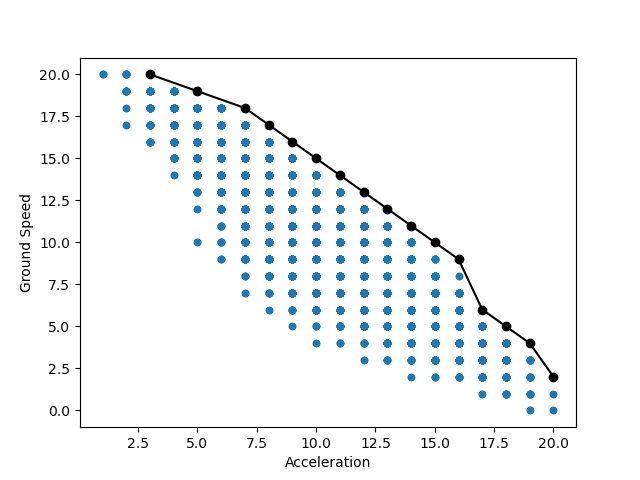

In [7]:
# Overlay pareto frontier with all Acceleration/Ground Speed combinations
stats.plot.scatter('Acceleration', 'Ground Speed')
plt.plot(coords['Acceleration'], coords['Ground Speed'], c='black')
plt.scatter(coords['Acceleration'], coords['Ground Speed'], c='black')

In [8]:
# Get corresponding DF for pareto frontier
coords = coords.rename(columns={'Acceleration': 'Acceleration', 'Ground Speed': 'Max Ground Speed'})
merged = stats.merge(coords, on='Acceleration')
stats_best = merged[merged['Ground Speed'] == merged['Max Ground Speed']]
stats_best.drop(columns='Max Ground Speed').sort_values('Acceleration')

,Character,Kart,Wheel,Glider,Weight,Acceleration,Off-road Traction,Mini-Turbo,Ground Speed,Water Speed,Anti-gravity Speed,Air Speed,Ground Handling,Water Handling,Anti-gravity Handling,Air Handling
7159,Wario,Circuit Special,Slick,Wario Wing,17.0,3.0,2.0,2.0,20.0,11.0,19.0,14.0,5.0,3.0,5.0,3.0
7158,Wario,Circuit Special,Slick,Super Glider,16.0,3.0,3.0,2.0,20.0,12.0,18.0,14.0,5.0,2.0,6.0,3.0
7131,Bowser,Circuit Special,Slick,Wario Wing,18.0,3.0,1.0,2.0,20.0,11.0,19.0,14.0,4.0,2.0,4.0,2.0
7130,Bowser,Circuit Special,Slick,Super Glider,17.0,3.0,2.0,2.0,20.0,12.0,18.0,14.0,4.0,1.0,5.0,2.0
6933,Bowser,Circuit Special,Off-Road,Wario Wing,18.0,5.0,7.0,3.0,19.0,15.0,17.0,15.0,3.0,3.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7449,Cat Peach,Pipe Frame,Roller,Peach Parasol,5.0,18.0,11.0,17.0,5.0,10.0,6.0,9.0,16.0,15.0,14.0,14.0
7486,Cat Peach,Biddybuggy,Roller,Cloud Glider,3.0,19.0,12.0,18.0,4.0,9.0,7.0,9.0,16.0,14.0,16.0,16.0
7487,Cat Peach,Biddybuggy,Roller,Peach Parasol,4.0,19.0,11.0,18.0,4.0,8.0,7.0,9.0,16.0,15.0,15.0,16.0
7488,Toadette,Biddybuggy,Roller,Cloud Glider,2.0,20.0,11.0,19.0,2.0,7.0,5.0,7.0,17.0,15.0,17.0,17.0


In [9]:
# 3D Optimization - Get pareto frontier coords for each projection (xy, yz, and xz) 
coords_xy = stats[['Acceleration', 'Ground Speed']].groupby(['Acceleration'], as_index=False).max()
coords_xy = coords_xy.drop_duplicates(subset=['Ground Speed'], keep = 'last')
coords_xy = coords_xy.rename(columns={'Acceleration': 'Acceleration', 'Ground Speed': 'Max Ground Speed'})

In [10]:
# 3D Optimization - Get pareto frontier coords for each projection (xy, yz, and xz) 
coords_xz = stats[['Acceleration', 'Ground Handling']].groupby(['Acceleration'], as_index=False).max()
coords_xz = coords_xz.drop_duplicates(subset=['Ground Handling'], keep = 'last')
coords_xz = coords_xz.rename(columns={'Acceleration': 'Acceleration', 'Ground Handling': 'Max Ground Handling'})

In [11]:
# 3D Optimization - Get pareto frontier coords for each projection (xy, yz, and xz) 
coords_yz = stats[['Ground Speed', 'Ground Handling']].groupby(['Ground Speed'], as_index=False).max()
coords_yz = coords_yz.drop_duplicates(subset=['Ground Handling'], keep = 'last')
coords_yz = coords_yz.rename(columns={'Ground Speed': 'Ground Speed', 'Ground Handling': 'Max Ground Handling'})

In [12]:
# 3D Optimization - Get pareto frontier DF for each projection (xy, yz, and xz) and get corresponding third 
# variable for each (z, x, and y, respectively) at 'optimized' 2D condition
merged_xy = stats.merge(coords_xy, on='Acceleration')
merged_xy = merged_xy[merged_xy['Ground Speed'] == merged_xy['Max Ground Speed']][['Acceleration', 'Ground Speed', 'Ground Handling']]
merged_xy = merged_xy.groupby(['Acceleration', 'Ground Speed'], as_index=False).max()

In [13]:
# 3D Optimization - Get pareto frontier DF for each projection (xy, yz, and xz) and get corresponding third 
# variable for each (z, x, and y, respectively) at 'optimized' 2D condition
merged_xz = stats.merge(coords_xz, on='Acceleration')
merged_xz = merged_xz[merged_xz['Ground Handling'] == merged_xz['Max Ground Handling']][['Acceleration', 'Ground Speed', 'Ground Handling']]
merged_xz = merged_xz.groupby(['Acceleration', 'Ground Handling'], as_index=False).max()

In [14]:
# 3D Optimization - Get pareto frontier DF for each projection (xy, yz, and xz) and get corresponding third 
# variable for each (z, x, and y, respectively) at 'optimized' 2D condition
merged_yz = stats.merge(coords_yz, on='Ground Speed')
merged_yz = merged_yz[merged_yz['Ground Handling'] == merged_yz['Max Ground Handling']][['Acceleration', 'Ground Speed', 'Ground Handling']]
merged_yz = merged_yz.groupby(['Ground Speed', 'Ground Handling'], as_index=False).max()

In [15]:
# 3D Optimization - Combine all projected pareto frontiers together and eliminate redundant values
combined_coords = pd.concat([merged_xy, merged_xz, merged_yz], ignore_index=True).drop_duplicates().sort_values(by='Acceleration')
combined_coords

,Acceleration,Ground Speed,Ground Handling
16,1.0,20.0,4.0
17,2.0,18.0,6.0
0,3.0,20.0,5.0
18,3.0,17.0,8.0
36,4.0,19.0,7.0
19,4.0,15.0,10.0
35,5.0,18.0,9.0
1,5.0,19.0,6.0
20,5.0,10.0,13.0
34,6.0,17.0,10.0


<IPython.core.display.Javascript object>


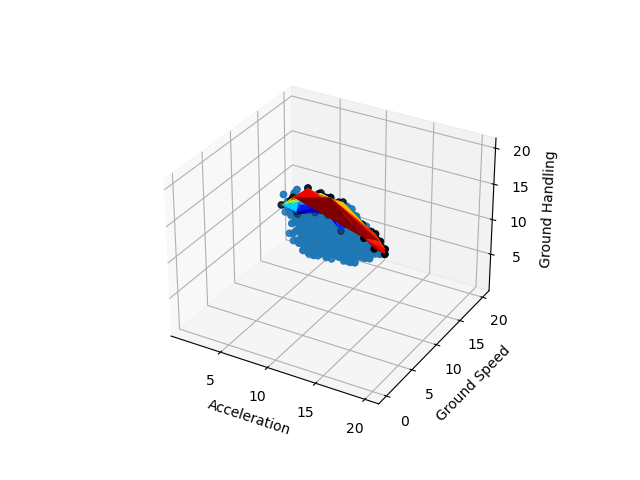

In [16]:
# Plot 3D combinations and corresponding pareto frontier surf
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlabel='Acceleration', ylabel='Ground Speed', zlabel='Ground Handling')
ax.scatter(stats['Acceleration'], stats['Ground Speed'], stats['Ground Handling'])
ax.scatter(combined_coords['Acceleration'], combined_coords['Ground Speed'], combined_coords['Ground Handling'], c='black')
ax.plot_trisurf(combined_coords['Acceleration'], combined_coords['Ground Speed'], combined_coords['Ground Handling'], cmap=plt.cm.jet)

In [17]:
# Get corresponding DF for pareto frontier
combined_coords = combined_coords.rename(columns={'Acceleration': 'Acceleration', 'Ground Speed': 'Ground Speed', 
                                                  'Ground Handling': 'Optimal Ground Handling'})
optimized_merged = stats.merge(combined_coords, on=['Acceleration', 'Ground Speed'])
optimized_merged = optimized_merged[optimized_merged['Ground Handling'] == optimized_merged['Optimal Ground Handling']]
optimized_merged.drop(columns='Optimal Ground Handling').sort_values('Acceleration')

,Character,Kart,Wheel,Glider,Weight,Acceleration,Off-road Traction,Mini-Turbo,Ground Speed,Water Speed,Anti-gravity Speed,Air Speed,Ground Handling,Water Handling,Anti-gravity Handling,Air Handling
1445,Wario,Badwagon,Metal,Wario Wing,19.0,1.0,8.0,1.0,20.0,15.0,15.0,15.0,4.0,5.0,3.0,2.0
1444,Wario,Badwagon,Metal,Super Glider,18.0,1.0,9.0,1.0,20.0,16.0,14.0,15.0,4.0,4.0,4.0,2.0
1476,Metal Mario,Badwagon,Metal,Super Glider,19.0,2.0,9.0,2.0,18.0,14.0,12.0,13.0,6.0,6.0,6.0,4.0
1477,Metal Mario,Badwagon,Metal,Wario Wing,20.0,2.0,8.0,2.0,18.0,13.0,13.0,13.0,6.0,7.0,5.0,4.0
1433,Wario,Circuit Special,Slick,Wario Wing,17.0,3.0,2.0,2.0,20.0,11.0,19.0,14.0,5.0,3.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,Cat Peach,Biddybuggy,Roller,Cloud Glider,3.0,19.0,12.0,18.0,4.0,9.0,7.0,9.0,16.0,14.0,16.0,16.0
1496,Baby Rosalina,Biddybuggy,Roller,Cloud Glider,0.0,20.0,12.0,20.0,0.0,5.0,3.0,5.0,19.0,17.0,19.0,19.0
1497,Baby Rosalina,Biddybuggy,Roller,Peach Parasol,1.0,20.0,11.0,20.0,0.0,4.0,3.0,5.0,19.0,18.0,18.0,19.0
822,Toadette,Biddybuggy,Roller,Cloud Glider,2.0,20.0,11.0,19.0,2.0,7.0,5.0,7.0,17.0,15.0,17.0,17.0
